In [9]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
  df.columns = df.columns.str.lower()


In [5]:
df.isnull().sum().any()


False

In [6]:
obj_col = df.select_dtypes(['object']).columns
num_col = df.select_dtypes(['int', 'float']).columns

In [7]:
for col in list(obj_col):
  print(f'{col} = > {len(df[col].unique())}')
  print()

car_name = > 98

fuel_type = > 3

selling_type = > 2

transmission = > 2



In [10]:
le = LabelEncoder()
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['selling_type'] = le.fit_transform(df['selling_type'])
df['transmission'] = le.fit_transform(df['transmission'])

In [11]:
df.drop('car_name', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           301 non-null    int64  
 1   selling_price  301 non-null    float64
 2   present_price  301 non-null    float64
 3   driven_kms     301 non-null    int64  
 4   fuel_type      301 non-null    int64  
 5   selling_type   301 non-null    int64  
 6   transmission   301 non-null    int64  
 7   owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [12]:
df.describe()


,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [14]:
df.duplicated().sum()

2

In [15]:
df.drop_duplicates(inplace = True)

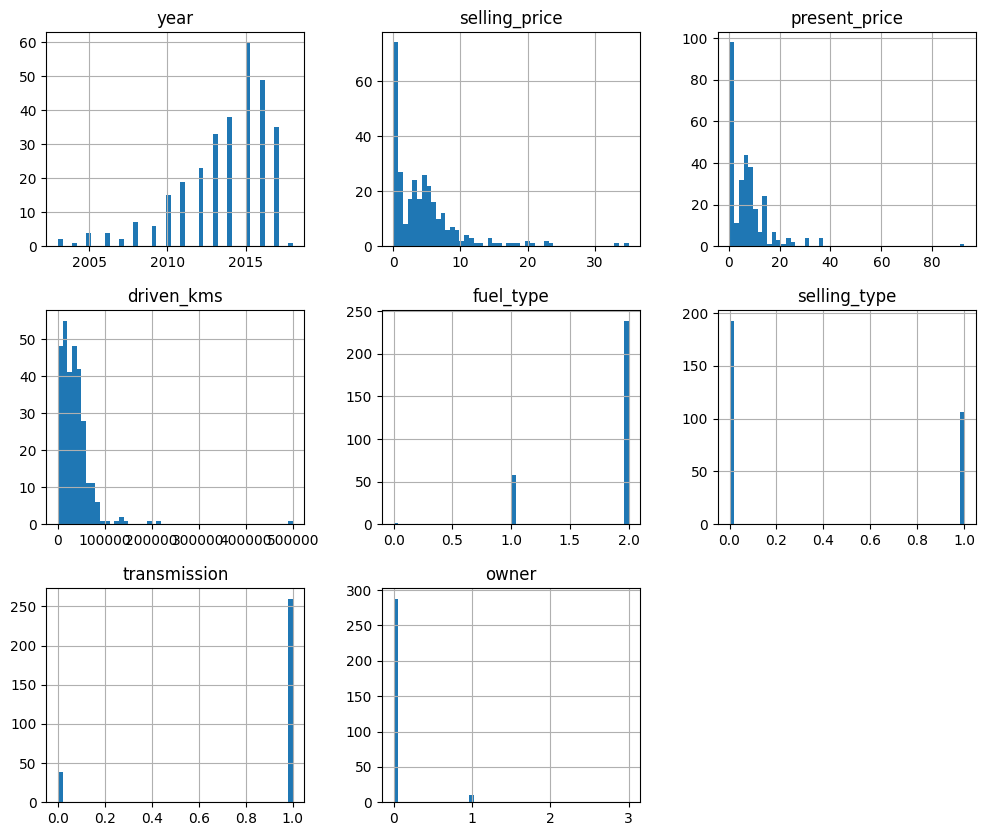

In [16]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

In [17]:
df['driven_kms'] = np.log(df['driven_kms'])
df['selling_price'] = np.log(df['selling_price'])
df['present_price'] = np.log(df['present_price'])

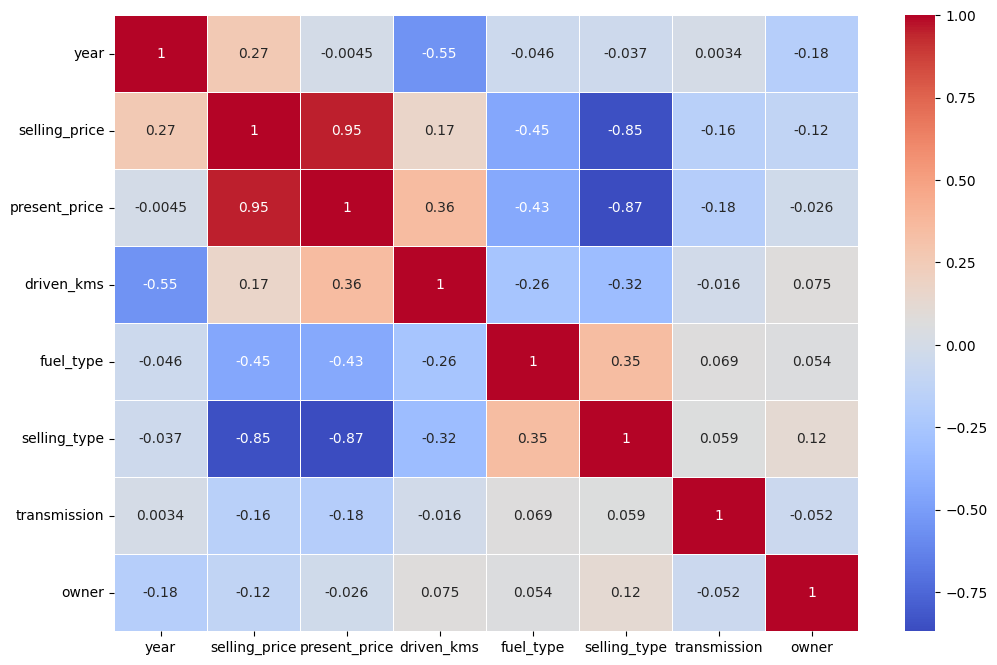

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [27]:
X=df.drop('selling_price',axis=1)
y=df['selling_price']
X.head()

,year,present_price,driven_kms,fuel_type,selling_type,transmission,owner
0,2014,1.720979,10.203592,2,0,1,0
1,2013,2.255493,10.668955,1,0,1,0
2,2017,2.287471,8.839277,2,0,1,0
3,2011,1.423108,8.556414,2,0,1,0
4,2014,1.927164,10.656082,1,0,1,0


In [28]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler()

X_scaler_minMax = my_scaler.fit_transform(X)

X_scaler_minMax.min(),X_scaler_minMax.max()

(0.0, 1.0)

In [29]:
X_scaler_minMax.min(),X_scaler_minMax.max()

(0.0, 1.0)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaler_minMax,y,test_size=0.2,random_state=42)

In [31]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (239, 7)  y_train =  (239,)
X_test  =  (60, 7)  y_test  =  (60,)


## **LinearRegression**

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.981427256153397
0.9744001607416634


In [33]:

print(regressor.coef_,"DDDD",regressor.intercept_)

[ 1.43960669  5.38450097 -0.48746432 -0.20186634 -0.14218111 -0.01274718
 -0.63915445] DDDD -2.02120843834178


In [54]:

y_pred = regressor.predict(X_test)

## **RandomForestRegressor**

In [37]:
model_r = RandomForestRegressor()

In [39]:
model_r.fit(X_train, y_train)


RandomForestRegressor()

In [40]:

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.981427256153397
0.9744001607416634


In [48]:
pred_r = model_r.predict(X_test)

mse = mean_squared_error(y_test, pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_r)
r2 = r2_score(y_test, pred_r)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(y_test)] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 0.04121617283375301
Root Mean Squared Error (RMSE): 0.2030176663094939
Mean Absolute Error (MAE): 0.09752138853760292
R-squared (R2): 0.9728534463302145
Baseline MSE: 1.5182838063023523
Baseline RMSE: 1.232186595569986


In [50]:
model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

scores_mse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-scores_mse)

print(f'Mean MSE: {-scores_mse.mean()}')
print(f'Standard Deviation of MSE: {scores_mse.std()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'Mean MAE: {-scores_mae.mean()}')
print(f'Standard Deviation of MAE: {scores_mae.std()}')
print(f'Mean R-squared: {scores_r2.mean()}')
print(f'Standard Deviation of R-squared: {scores_r2.std()}')

model.fit(X_train, y_train)
#pred = model.predict(X_train)
pred = model_r.predict(X_test)

mse_test = mean_squared_error(y_test, pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, pred)
r2_test = r2_score(y_test, pred)

print('\n\n')
print(f'Test Set MSE: {mse_test}')
print(f'Test Set RMSE: {rmse_test}')
print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')

Mean MSE: 0.06259836255061273
Standard Deviation of MSE: 0.03862694596716279
Mean RMSE: 0.23967617505729014
Standard Deviation of RMSE: 0.07178923081159146
Mean MAE: 0.16270372176088937
Standard Deviation of MAE: 0.02923728110617347
Mean R-squared: 0.9627007235097089
Standard Deviation of R-squared: 0.01874786327742328



Test Set MSE: 0.04121617283375301
Test Set RMSE: 0.2030176663094939
Test Set MAE: 0.09752138853760292
Test Set R-squared: 0.9728534463302145
